<a href="https://colab.research.google.com/github/dalvino/dalvino/blob/main/RUL_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### REMAINING USEFUL LIFE


In [9]:
# Import Libraries

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [10]:

# List of data text files
files = ['RUL_FD001.txt', 'test_FD001.txt', 'train_FD001.txt']

# Convert text files to csv
for file in files:
    # Open the .txt file and read its content
    with open(file, 'r') as txt_file:
        lines = txt_file.readlines()
    # Open a .csv file to write the converted content
    with open(f'{file}_output.csv', 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)

        # Process each line and write to CSV
        for line in lines:
            # Split the line into columns based on spaces or tabs
            writer.writerow(line.strip().split())


In [11]:
import pandas as pd

rul= pd.read_csv("RUL_FD001.txt_output.csv", header=None)
test = pd.read_csv("test_FD001.txt_output.csv", header=None)
train = pd.read_csv("train_FD001.txt_output.csv", header=None)

In [12]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [13]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [14]:
rul.head()


,0
0,112
1,98
2,69
3,82
4,91


In [15]:
# Rename Columns
rul.columns = ['RUL']
test.columns = ['unit', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
train.columns = ['unit', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

In [16]:
train.head()


,unit,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [17]:
test.head()

,unit,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [18]:
rul.head()

,RUL
0,112
1,98
2,69
3,82
4,91


In [19]:
# Identify duplicate rows
rul_duplicates = rul.duplicated().sum()
print(f"Number of duplicate entries in RUL dataframe: {rul_duplicates}")
print(f"The total number of records in this dataframe: {len(rul)}")
print("\n\n")

Number of duplicate entries in RUL dataframe: 29
The total number of records in this dataframe: 100





In [20]:
# Identify duplicate rows
train_duplicates = train.duplicated().sum()
print(f"Number of duplicate entries in train dataframe: {train_duplicates}")
print("\n\n")

Number of duplicate entries in train dataframe: 0





In [21]:
# Identify duplicate rows
test_duplicates = test.duplicated().sum()
print(f"Number of duplicate entries in test dataframe: {test_duplicates}")
print("\n\n")

Number of duplicate entries in test dataframe: 0





<Axes: ylabel='Density'>

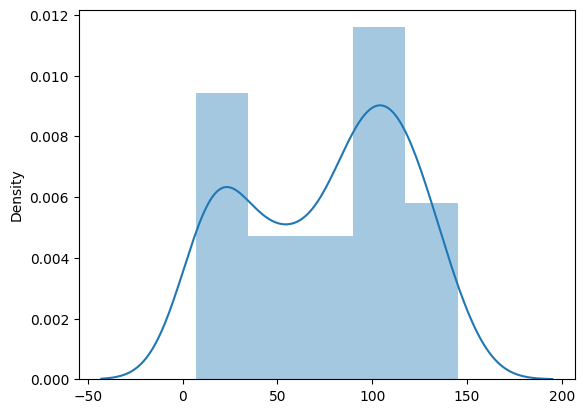

In [22]:
sns.distplot(rul,kde=True)

In [23]:
rul.describe()

,RUL
count,100.00000
mean,75.52000
std,41.76497
min,7.00000
25%,32.75000
50%,86.00000
75%,112.25000
max,145.00000


In [24]:
# Outlier examination
train.describe().T

,count,mean,std,min,25%,50%,75%,max
unit,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
setting1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
setting2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
setting3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
s1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
s2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200


In [25]:
# Outlier examination of test set
test.describe().T

,count,mean,std,min,25%,50%,75%,max
unit,13096.0,51.543907,2.828942e+01,1.0000,28.0000,52.0000,76.0000,100.0000
cycle,13096.0,76.836515,5.305775e+01,1.0000,33.0000,69.0000,113.0000,303.0000
setting1,13096.0,-0.000011,2.202685e-03,-0.0082,-0.0015,-0.0000,0.0015,0.0078
setting2,13096.0,0.000004,2.940306e-04,-0.0006,-0.0002,-0.0000,0.0003,0.0007
setting3,13096.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
s1,13096.0,518.670000,6.014263e-11,518.6700,518.6700,518.6700,518.6700,518.6700
s2,13096.0,642.475088,4.008993e-01,641.1300,642.1975,642.4600,642.7400,644.3000
s3,13096.0,1588.099204,5.003274e+00,1569.0400,1584.6000,1587.9900,1591.3625,1607.5500
s4,13096.0,1404.735362,6.688309e+00,1384.3900,1399.9500,1404.4400,1409.0500,1433.3600
s5,13096.0,14.620000,2.671743e-12,14.6200,14.6200,14.6200,14.6200,14.6200


In [26]:
# Drop outlier sensors and variables
train.drop(['s1', 's5', 's10', 's16', 's18', 's19', 'setting3'], axis=1, inplace=True)
test.drop(['s1', 's5', 's10', 's16', 's18', 's19', 'setting3'], axis=1, inplace=True)

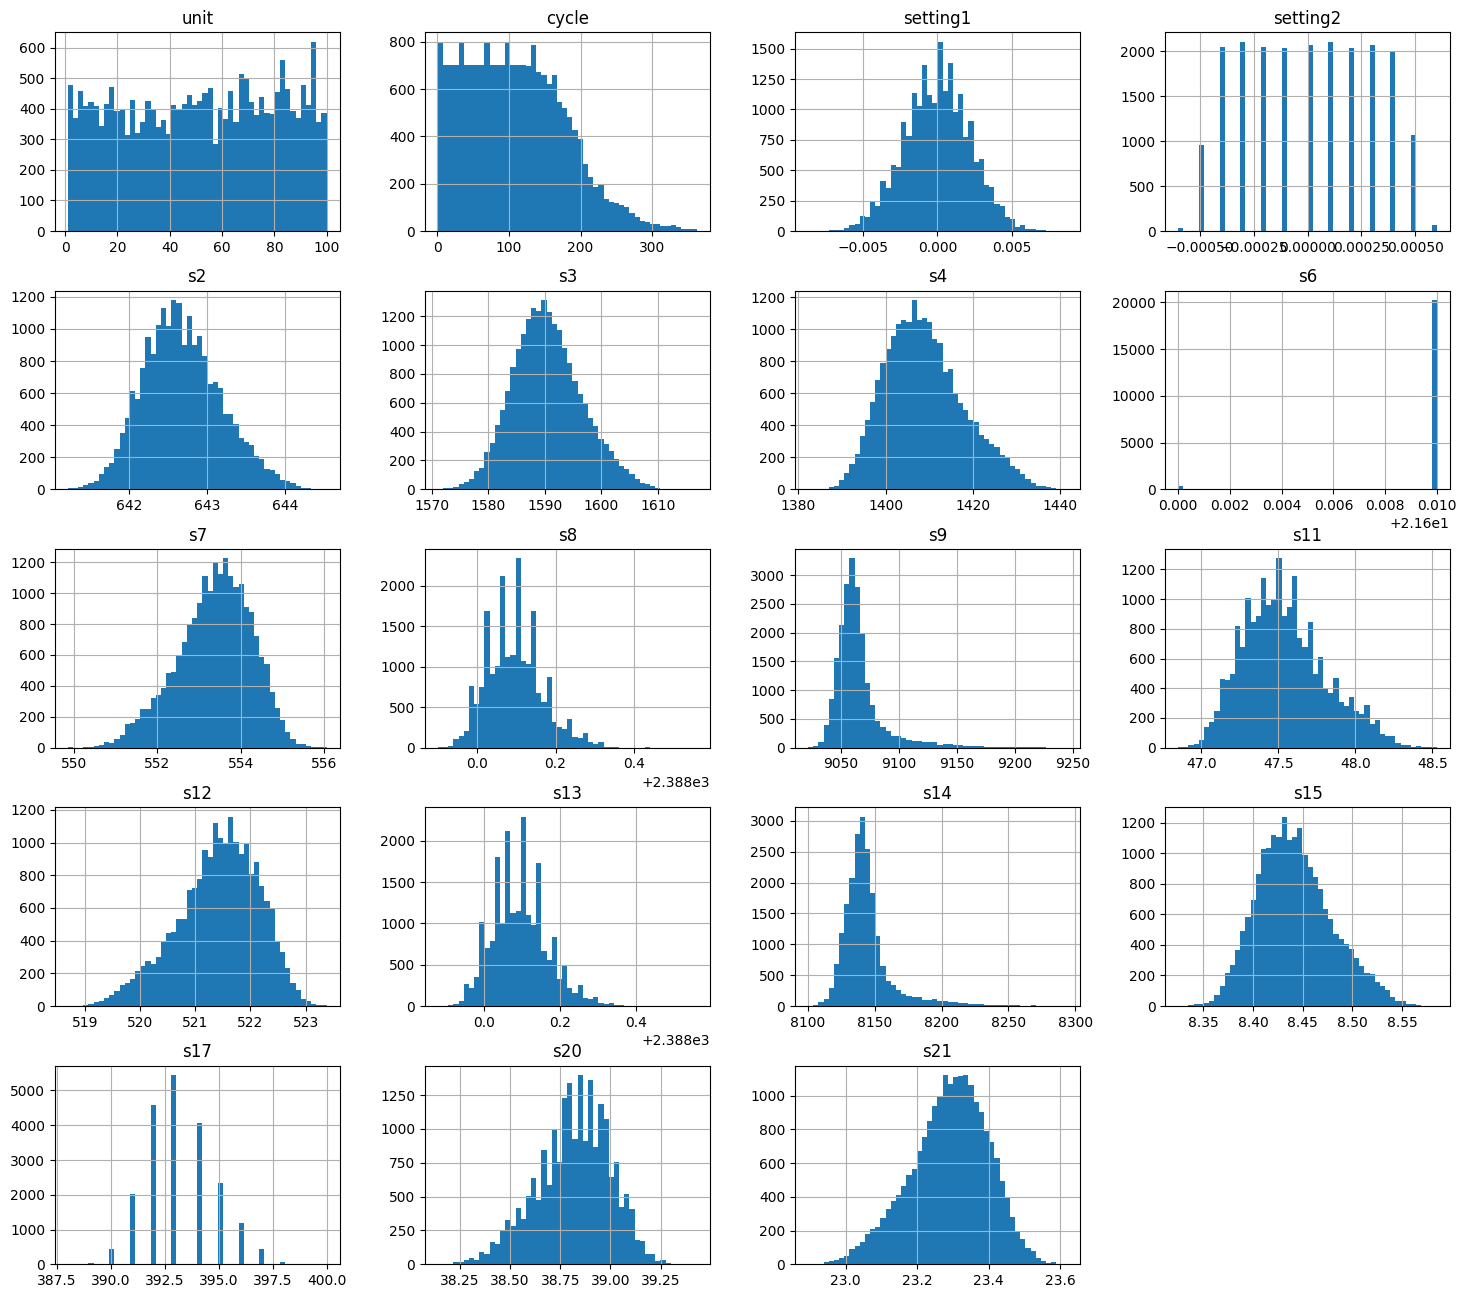

In [27]:
train.hist(bins=50, figsize=(18,16))
plt.show()

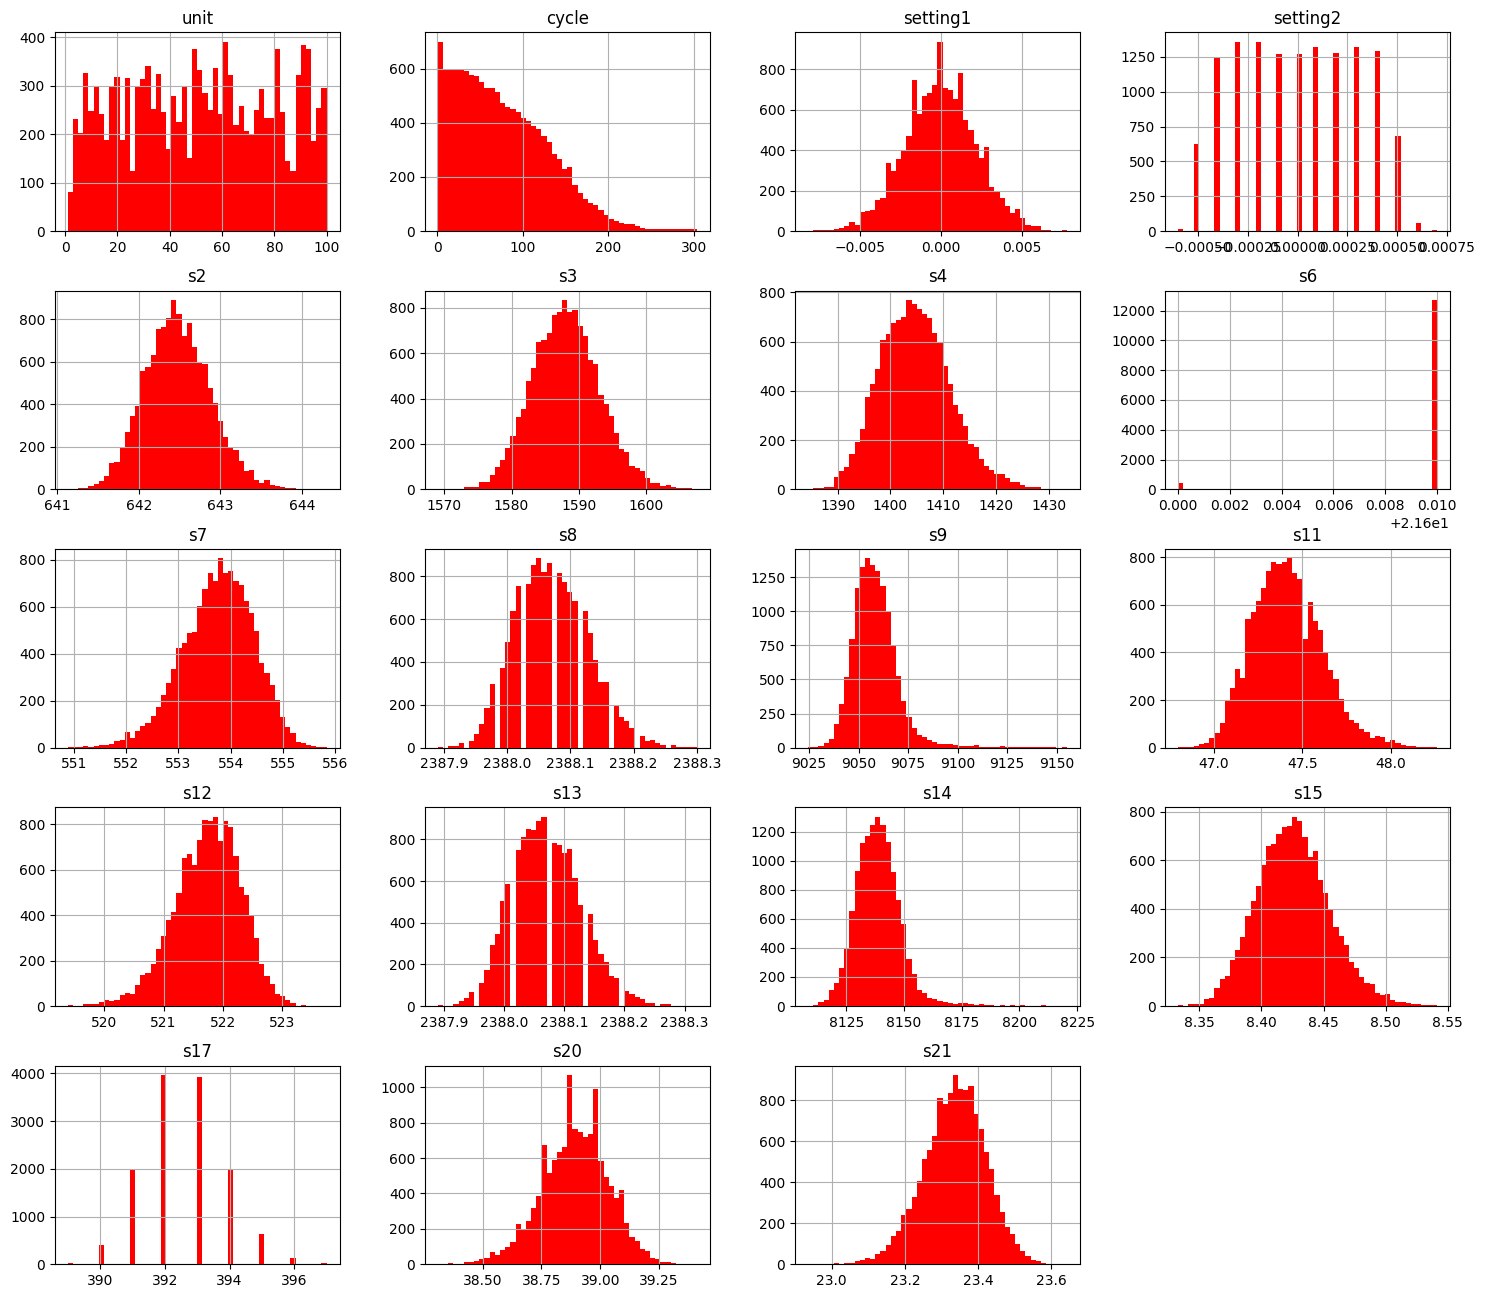

In [28]:
test.hist(bins=50, figsize=(18,16), color="red")
plt.show()

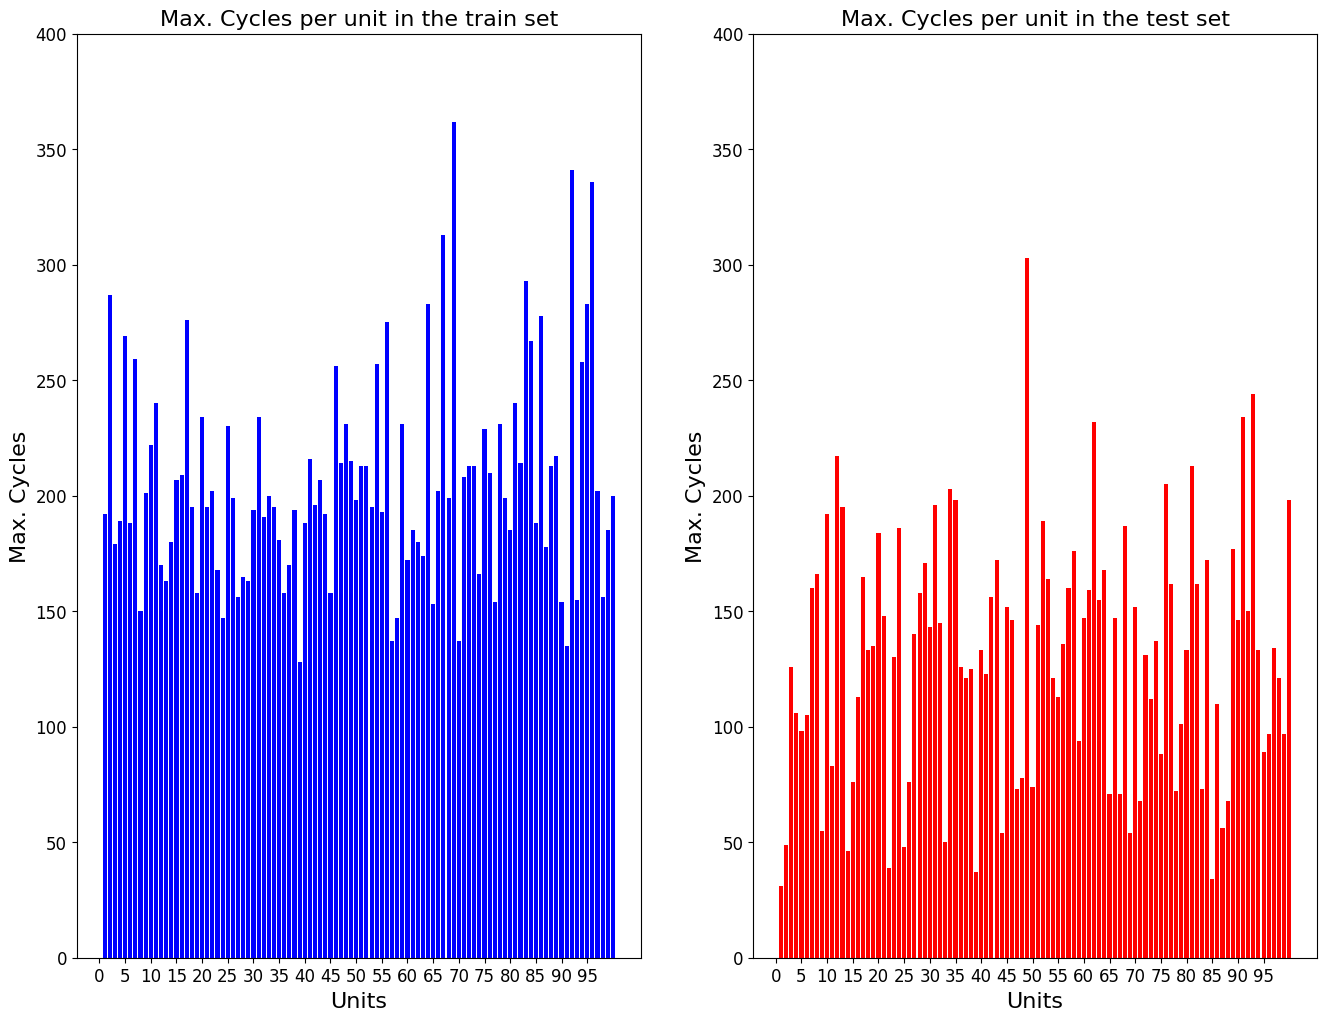

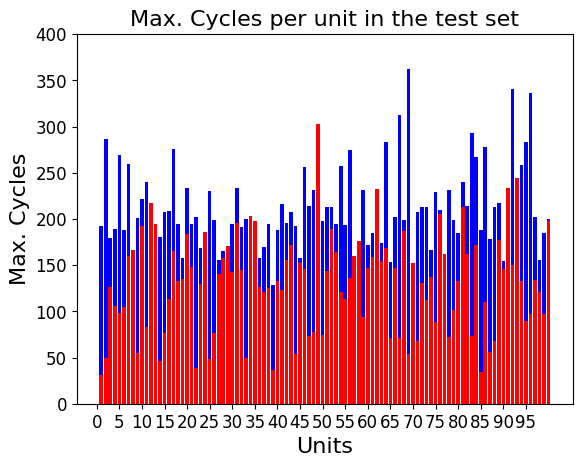

In [29]:
cyclestrain = train.groupby('unit', as_index=False)['cycle'].max()
cyclestest = test.groupby('unit', as_index=False)['cycle'].max()
fig = plt.figure(figsize = (16,12))
fig.add_subplot(1,2,1)
bar_labels = list(cyclestrain['unit'])
bars = plt.bar(list(cyclestrain['unit']), cyclestrain['cycle'], color='blue')
plt.ylim([0, 400])
plt.xlabel('Units', fontsize=16)
plt.ylabel('Max. Cycles', fontsize=16)
plt.title('Max. Cycles per unit in the train set', fontsize=16)
plt.xticks(np.arange(min(bar_labels)-1, max(bar_labels)-1, 5.0), fontsize=12)
plt.yticks(fontsize=12)
fig.add_subplot(1,2,2)
bars = plt.bar(list(cyclestest['unit']), cyclestest['cycle'], color='red')
plt.ylim([0, 400])
plt.xlabel('Units', fontsize=16)
plt.ylabel('Max. Cycles', fontsize=16)
plt.title('Max. Cycles per unit in the test set', fontsize=16)
plt.xticks(np.arange(min(bar_labels)-1, max(bar_labels)-1, 5.0), fontsize=12)
plt.yticks(fontsize=12)
plt.show()
bar_labels = list(cyclestrain['unit'])
bars = plt.bar(list(cyclestrain['unit']), cyclestrain['cycle'], color='blue')
plt.ylim([0, 400])
plt.xlabel('Units', fontsize=16)
plt.ylabel('Max. Cycles', fontsize=16)
plt.title('Max. Cycles per unit in the train set', fontsize=16)
plt.xticks(np.arange(min(bar_labels)-1, max(bar_labels)-1, 5.0), fontsize=12)
plt.yticks(fontsize=12)
fig.add_subplot(1,2,2)
bars = plt.bar(list(cyclestest['unit']), cyclestest['cycle'], color='red')
plt.ylim([0, 400])
plt.xlabel('Units', fontsize=16)
plt.ylabel('Max. Cycles', fontsize=16)
plt.title('Max. Cycles per unit in the test set', fontsize=16)
plt.xticks(np.arange(min(bar_labels)-1, max(bar_labels)-1, 5.0), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

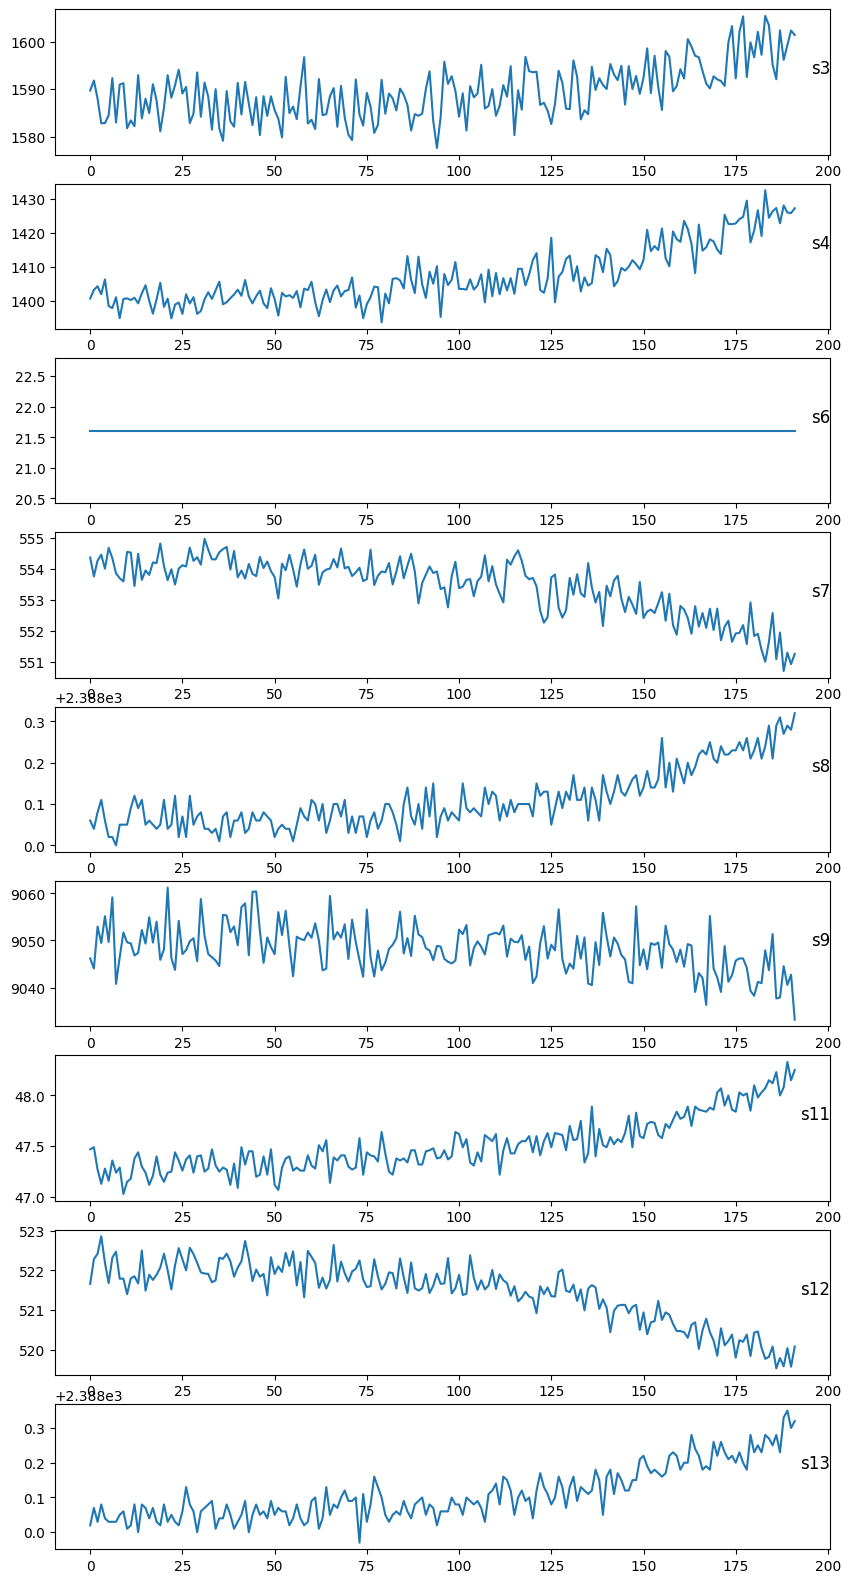

In [30]:
values = train[train.unit==1].values
groups = [5, 6, 7, 8, 9, 10, 11,12,13]
i = 1
plt.figure(figsize=(10,20))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(train.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

<Axes: xlabel='TTF', ylabel='Density'>

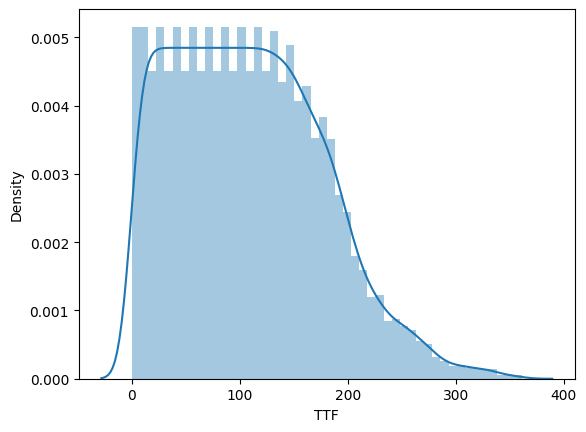

In [31]:
train = pd.merge(train, train.groupby('unit', as_index=False)['cycle'].max(), how='left', on='unit')

# Rename the columns to 'cycle' and 'maxcycles'
train.rename(columns={"cycle_x": "cycle", "cycle_y": "maxcycles"}, inplace=True) # Fixed typo here: 'cycles_y' should be 'cycle_y'

# Now, the following line should work without error:
train['TTF'] = train['maxcycles'] - train['cycle']
sns.distplot(train['TTF'],kde=True)

In [32]:
train['TTF'].describe()

,TTF
count,20631.000000
mean,107.807862
std,68.880990
min,0.000000
25%,51.000000
50%,103.000000
75%,155.000000
max,361.000000


In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


In [34]:
train.describe().T


,count,mean,std,min,25%,50%,75%,max
unit,20631.0,51.506568,29.227633,1.0000,26.0000,52.0000,77.0000,100.0000
cycle,20631.0,108.807862,68.880990,1.0000,52.0000,104.0000,156.0000,362.0000
setting1,20631.0,-0.000009,0.002187,-0.0087,-0.0015,0.0000,0.0015,0.0087
setting2,20631.0,0.000002,0.000293,-0.0006,-0.0002,0.0000,0.0003,0.0006
s2,20631.0,642.680934,0.500053,641.2100,642.3250,642.6400,643.0000,644.5300
s3,20631.0,1590.523119,6.131150,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s4,20631.0,1408.933782,9.000605,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s6,20631.0,21.609803,0.001389,21.6000,21.6100,21.6100,21.6100,21.6100
s7,20631.0,553.367711,0.885092,549.8500,552.8100,553.4400,554.0100,556.0600
s8,20631.0,2388.096652,0.070985,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600


In [35]:
ntrain  = train.copy()


In [36]:
ntrain.iloc[:,2:19] = scaler.fit_transform(ntrain.iloc[:,2:19])


In [37]:
ntrain.iloc[:,2:19]

,setting1,setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,0.459770,0.166667,0.183735,0.406802,0.309757,1.0,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662
1,0.609195,0.250000,0.283133,0.453019,0.352633,1.0,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014
2,0.252874,0.750000,0.343373,0.369523,0.370527,1.0,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375
3,0.540230,0.500000,0.343373,0.256159,0.331195,1.0,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386
4,0.390805,0.333333,0.349398,0.257467,0.404625,1.0,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,0.477011,0.250000,0.686747,0.587312,0.782917,1.0,0.254428,0.439394,0.196491,0.726190,0.170576,0.558824,0.194344,0.656791,0.750000,0.271318,0.109500
20627,0.408046,0.083333,0.701807,0.729453,0.866475,1.0,0.162641,0.500000,0.194651,0.708333,0.211087,0.500000,0.188668,0.727203,0.583333,0.124031,0.366197
20628,0.522989,0.500000,0.665663,0.684979,0.775321,1.0,0.175523,0.515152,0.198196,0.738095,0.281450,0.529412,0.212148,0.922278,0.833333,0.232558,0.053991
20629,0.436782,0.750000,0.608434,0.746021,0.747468,1.0,0.133655,0.530303,0.233285,0.916667,0.208955,0.514706,0.203065,0.823394,0.583333,0.116279,0.234466


In [38]:
ntrain.describe().T


,count,mean,std,min,25%,50%,75%,max
unit,20631.0,51.506568,29.227633,1.0,26.000000,52.000000,77.000000,100.0
cycle,20631.0,108.807862,68.880990,1.0,52.000000,104.000000,156.000000,362.0
setting1,20631.0,0.499490,0.125708,0.0,0.413793,0.500000,0.586207,1.0
setting2,20631.0,0.501959,0.244218,0.0,0.333333,0.500000,0.750000,1.0
s2,20631.0,0.443052,0.150618,0.0,0.335843,0.430723,0.539157,1.0
s3,20631.0,0.424746,0.133664,0.0,0.331807,0.415522,0.508829,1.0
s4,20631.0,0.450435,0.151935,0.0,0.339467,0.435348,0.545324,1.0
s6,20631.0,0.980321,0.138898,0.0,1.000000,1.000000,1.000000,1.0
s7,20631.0,0.566459,0.142527,0.0,0.476651,0.578100,0.669887,1.0
s8,20631.0,0.297957,0.107554,0.0,0.227273,0.287879,0.363636,1.0


In [39]:
ntest = test.copy()

In [40]:
pd.DataFrame(ntest.columns).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,unit,cycle,setting1,setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21


In [41]:
ntest.iloc[:,2:19] = scaler.transform(ntest.iloc[:,2:19])
ntest.describe().T


,count,mean,std,min,25%,50%,75%,max
unit,13096.0,51.543907,28.289423,1.000000,28.000000,52.000000,76.000000,100.000000
cycle,13096.0,76.836515,53.057749,1.000000,33.000000,69.000000,113.000000,303.000000
setting1,13096.0,0.499358,0.126591,0.028736,0.413793,0.500000,0.586207,0.948276
setting2,13096.0,0.503532,0.245025,0.000000,0.333333,0.500000,0.750000,1.083333
s2,13096.0,0.381051,0.120753,-0.024096,0.297440,0.376506,0.460843,0.930723
s3,13096.0,0.371903,0.109075,-0.043601,0.295618,0.369523,0.443046,0.795945
s4,13096.0,0.379564,0.112902,0.036124,0.298785,0.374578,0.452397,0.862762
s6,13096.0,0.970067,0.170408,0.000000,1.000000,1.000000,1.000000,1.000000
s7,13096.0,0.629231,0.109708,0.165862,0.557166,0.636071,0.706924,0.964573
s8,13096.0,0.259037,0.087033,-0.015152,0.196970,0.257576,0.318182,0.606061


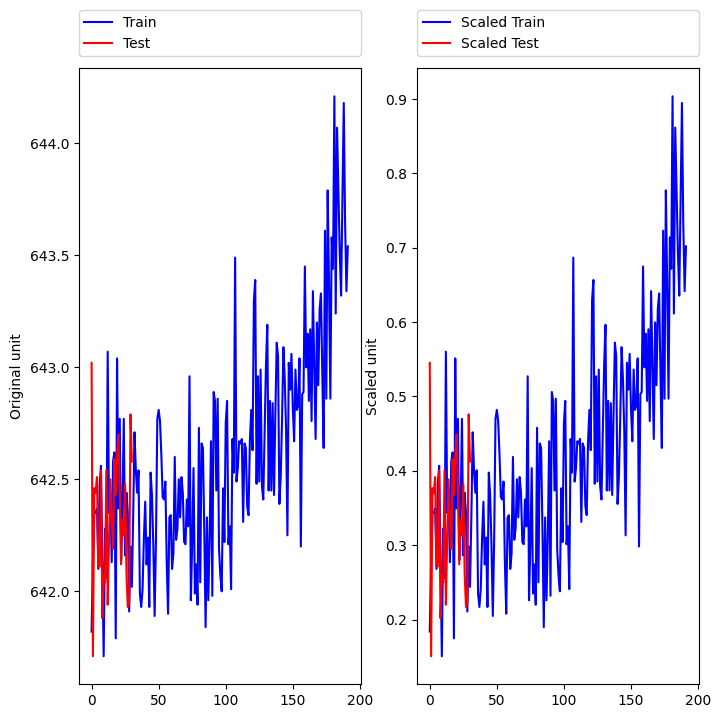

In [42]:
fig = plt.figure(figsize = (8, 8))
fig.add_subplot(1,2,1)
plt.plot(train[train.unit==1].s2, color="blue")
plt.plot(test[test.unit==1].s2, color="red")
plt.legend(['Train','Test'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Original unit')
fig.add_subplot(1,2,2)
plt.plot(ntrain[ntrain.unit==1].s2, color="blue")
plt.plot(ntest[ntest.unit==1].s2, color="red")
plt.legend(['Scaled Train','Scaled Test'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Scaled unit')
plt.show()

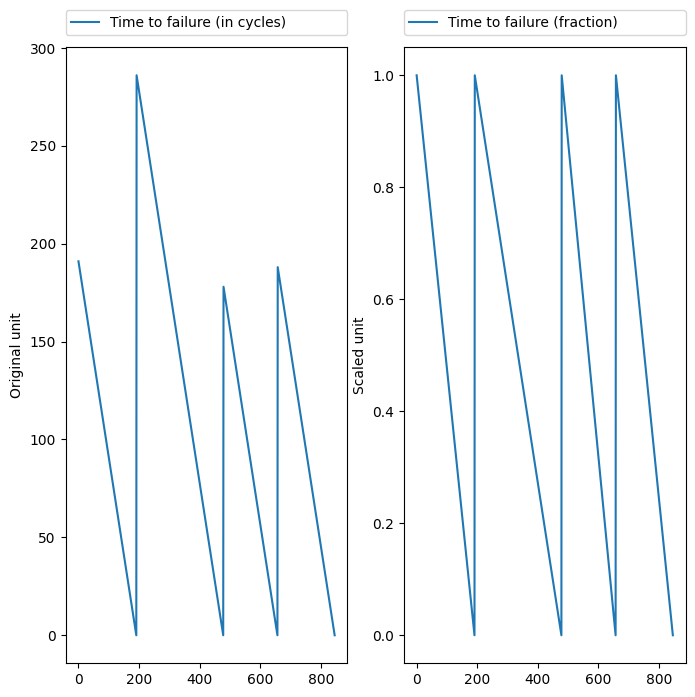

In [43]:
# Fraction Time-to-Failure
## fraction of remaining cycles


def fractionTTF(dat,q):
    return(dat.TTF[q]-dat.TTF.min()) / float(dat.TTF.max()-dat.TTF.min())
fTTFz = []
fTTF = []
for i in range(train['unit'].min(),train['unit'].max()+1):
    dat=train[train.unit==i]
    dat = dat.reset_index(drop=True)
    for q in range(len(dat)):
        fTTFz = fractionTTF(dat, q)
        fTTF.append(fTTFz)
ntrain['fTTF'] = fTTF
mx = cyclestrain.iloc[0:4,1].sum() # Define 'mx' here
fig = plt.figure(figsize = (8, 8))
fig.add_subplot(1,2,1)
plt.plot(ntrain.TTF[0:mx])
plt.legend(['Time to failure (in cycles)'], bbox_to_anchor=(0., 1.02, 1., .102),
           loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Original unit')
fig.add_subplot(1,2,2)
plt.plot(ntrain.fTTF[0:mx])
plt.legend(['Time to failure (fraction)'], bbox_to_anchor=(0., 1.02, 1., .102),
           loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Scaled unit')
plt.show()

In [44]:
X_train = ntrain.values[:,1:19]
X_train


array([[1.00000000e+00, 4.59770115e-01, 1.66666667e-01, ...,
        3.33333333e-01, 7.13178295e-01, 7.24661696e-01],
       [2.00000000e+00, 6.09195402e-01, 2.50000000e-01, ...,
        3.33333333e-01, 6.66666667e-01, 7.31013532e-01],
       [3.00000000e+00, 2.52873563e-01, 7.50000000e-01, ...,
        1.66666667e-01, 6.27906977e-01, 6.21375311e-01],
       ...,
       [1.98000000e+02, 5.22988506e-01, 5.00000000e-01, ...,
        8.33333333e-01, 2.32558140e-01, 5.39906103e-02],
       [1.99000000e+02, 4.36781609e-01, 7.50000000e-01, ...,
        5.83333333e-01, 1.16279070e-01, 2.34465617e-01],
       [2.00000000e+02, 3.16091954e-01, 8.33333333e-02, ...,
        6.66666667e-01, 1.78294574e-01, 2.18171776e-01]])

In [45]:
X_train.shape

(20631, 18)

In [46]:
#Y_train = traincopy.values[2:19]
Y_train = ntrain.values[:,21]
Y_train

array([1.        , 0.9947644 , 0.9895288 , ..., 0.01005025, 0.00502513,
       0.        ])

In [47]:
Y_train.shape

(20631,)

In [48]:
X_test = ntest.values[:,1:19]
X_test

array([[  1.        ,   0.63218391,   0.75      , ...,   0.33333333,
          0.55813953,   0.66183375],
       [  2.        ,   0.34482759,   0.25      , ...,   0.41666667,
          0.68217054,   0.68682684],
       [  3.        ,   0.51724138,   0.58333333, ...,   0.41666667,
          0.72868217,   0.72134769],
       ...,
       [196.        ,   0.46551724,   0.25      , ...,   0.58333333,
          0.37209302,   0.4293013 ],
       [197.        ,   0.2816092 ,   0.58333333, ...,   0.58333333,
          0.40310078,   0.51877934],
       [198.        ,   0.57471264,   0.75      , ...,   0.66666667,
          0.43410853,   0.40223695]])

In [49]:
# Random Forest Model Fitting
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [50]:
score = regressor.predict(X_test)


In [51]:
score[0:10]


array([1.        , 0.9953017 , 0.989722  , 0.98460903, 0.98066888,
       0.97523592, 0.96950198, 0.96453583, 0.96067491, 0.95679604])

In [52]:
print(score.min(), score.max())


0.015598388718534188 1.0


###Modeling

In [53]:
test = pd.merge(test, test.groupby('unit',as_index=False)['cycle'].max(), how='left', on='unit')
test.rename(columns={"cycles_x": "cycles", "cycles_y": "maxcycles"}, inplace=True)
test['score'] = score
test.head()

,unit,cycle_x,setting1,setting2,s2,s3,s4,s6,s7,s8,...,s11,s12,s13,s14,s15,s17,s20,s21,cycle_y,score
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,...,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735,31,1.000000
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,...,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916,31,0.995302
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,...,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166,31,0.989722
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,...,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737,31,0.984609
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,...,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130,31,0.980669


In [54]:
def totcycles(data):
 return(data['cycle_x'] / (1-data['score']))

test['maxpredcycles'] = totcycles(test)

In [55]:
def RULfunction(data):
 return(data['maxpredcycles'] - data['cycle_y'])

test['RUL'] = RULfunction(test)


In [56]:
test['RUL'].head()

,RUL
0,inf
1,394.686334
2,260.885519
3,228.892667
4,227.650329


# Evaluation Stage

In [61]:
t = test.columns == 'RUL'
ind = [i for i, x in enumerate(t) if x]
predictedRUL = []
for i in range(test.unit.min(), test.unit.max()+1):
  npredictedRUL = test[test.unit==i].iloc[test[test.unit==i].cycle_x.max()-1,ind]
  predictedRUL.append(npredictedRUL)

In [63]:
xtrueRUL = list(rul['RUL'])
otrueRUL = []

for i in range(0,len(xtrueRUL)):
 otrueRUL = np.concatenate((otrueRUL, list(reversed(np.arange(int(xtrueRUL[i]))))))
 xpredictedRUL = list(round(x) for x in predictedRUL)

opredictedRUL = []
for i in range(0,len(xpredictedRUL)):
  opredictedRUL = np.concatenate((opredictedRUL, list(reversed(np.arange(xpredictedRUL[i].item())))))

xpredictedRUL1= []
for i in range(0,len(xpredictedRUL)):
  xpredictedRUL1.append(int(xpredictedRUL[i]))

xpredictedRUL2 = np.array(xpredictedRUL1)


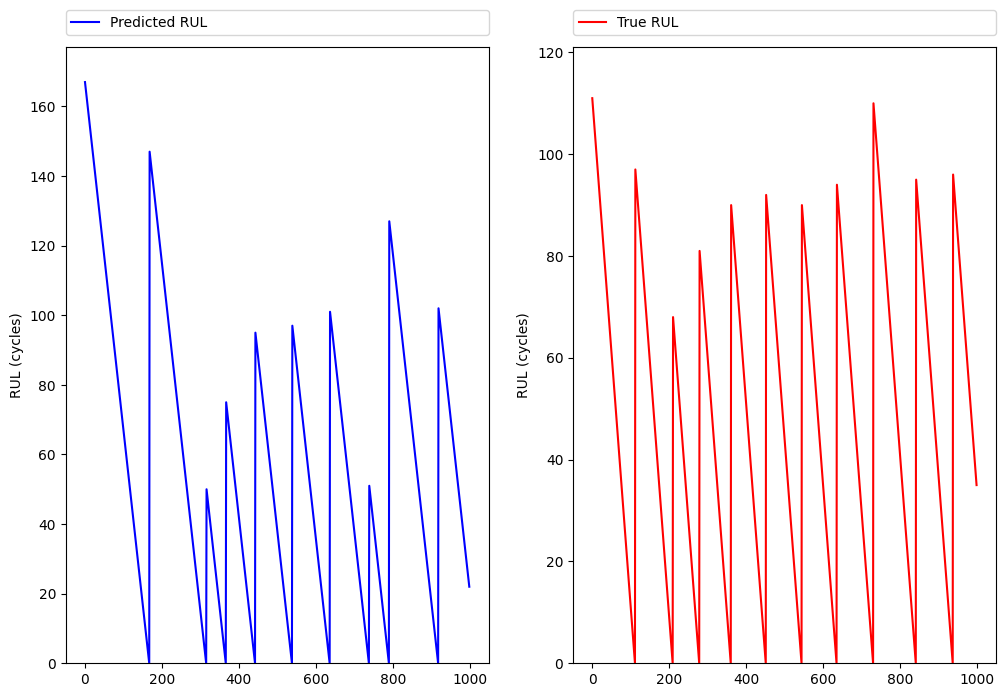

In [64]:
mx = 1000
fig = plt.figure(figsize = (12, 8))
fig.add_subplot(1,2,1)
plt.plot(opredictedRUL[0:mx], color='blue')
plt.legend(['Predicted RUL'], bbox_to_anchor=(0., 1.02, 1., .102),loc=3, mode="expand", borderaxespad=0)
plt.ylim(0, opredictedRUL[0:mx].max()+10)
plt.ylabel('RUL (cycles)')
fig.add_subplot(1,2,2)
plt.plot(otrueRUL[0:mx], color='red')
plt.legend(['True RUL'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('RUL (cycles)')
plt.ylim(0,otrueRUL[0:mx].max()+10)
plt.show()

In [65]:
# RUL differences between predicted and actual values
df1 = pd.concat([pd.Series(rul['RUL']), pd.Series(xpredictedRUL2)], axis=1)
df1.columns = ['true', 'predicted']

In [66]:
df1['diff'] = df1['predicted']-df1['true']
df1.head()

,true,predicted,diff
0,112,168,56
1,98,148,50
2,69,51,-18
3,82,76,-6
4,91,96,5


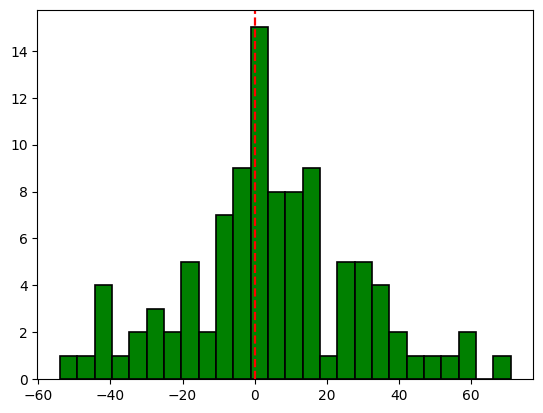

In [67]:
plt.hist(df1['diff'], bins=26, color="green", edgecolor='black', linewidth=1.2)
plt.axvline(0, color="red", linestyle='dashed', linewidth=1.6)
plt.show()

In [69]:
pd.DataFrame({'Count': [(df1['diff']<0).sum(), (df1['diff']==0).sum(),
 (df1['diff']>0).sum()]}, columns=['Count'],
 index=['Less than', 'Zero', 'Greater than'])

,Count
Less than,39
Zero,0
Greater than,61


### Regression Metrics

In [73]:
# compute the R Square for model
from sklearn import metrics

print("Random Forest R-squared:", "{:.2%}".format(metrics.r2_score(rul, xpredictedRUL)))

Random Forest R-squared: 65.32%


In [74]:
# compute the RMSE of our predictions

print("The Root Mean Squared Error (RMSE) is:",
 round(np.sqrt(metrics.mean_squared_error(rul, xpredictedRUL)),2))

The Root Mean Squared Error (RMSE) is: 24.47


In [76]:
# calculate MAE using scikit-learn
print("The Mean Absolute Error (MAE) is:",
 round(metrics.mean_absolute_error(rul, xpredictedRUL),2))

The Mean Absolute Error (MAE) is: 18.45


In [79]:
# Arrange feature importance
feature_labels = np.array(['unit', 'cycle', 'op_setting1', 'op_setting2', 's2', 's3', 's4', 's6', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21', 'maxcycles', 'score', 'maxpredcycles'])
importance = regressor.feature_importances_
feature_indexes_by_importance = importance.argsort()[::-1]

for index in feature_indexes_by_importance:
 print('{}:{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

unit:82.76%
s9:10.08%
s3:1.48%
s8:1.18%
s11:0.73%
s6:0.53%
s13:0.46%
s14:0.45%
s20:0.37%
op_setting2:0.33%
s2:0.32%
s17:0.28%
s7:0.27%
s12:0.25%
cycle:0.25%
op_setting1:0.15%
s15:0.11%
s4:0.00%


### Save model / Deployment

In [80]:
import pickle
model = regressor

In [82]:
rul8 = open("rul_model8", "wb")

In [83]:
pickle.dump(model , rul8)


In [84]:
rul8.close()